In [1]:
import pandas as pd
import numpy as np

In [2]:
file=r'C:\Users\akhil\Downloads\train.csv'

In [3]:
data=pd.read_csv(file)

In [6]:
data.shape

(1460, 81)

In [9]:
import matplotlib.pyplot as plt

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
#Missing Values Making a list that contain variables with missing values
var=[i for i in data.columns if data[i].isnull().sum()>1]


In [23]:
var

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [31]:
#Now lets check the impact of the missing values of each variable on our  target :SalePrice
def var_impc_na(df,var):
    df=data.copy()
    df[var]=np.where(df[var].isnull(),1,0)
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()

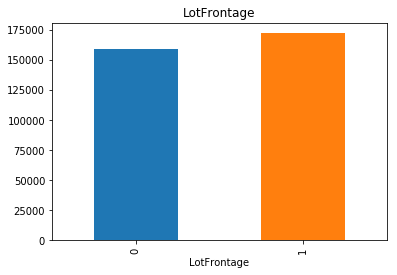

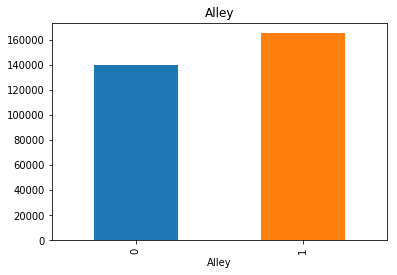

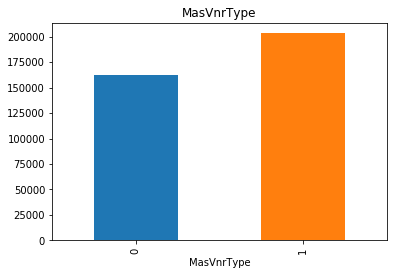

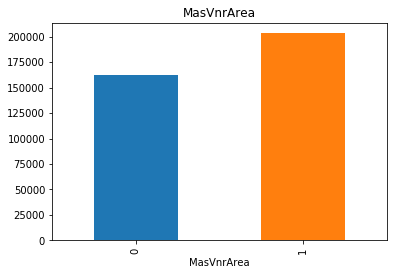

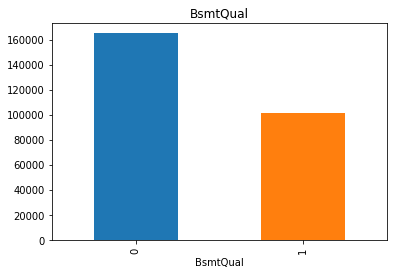

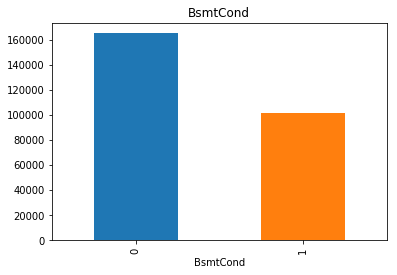

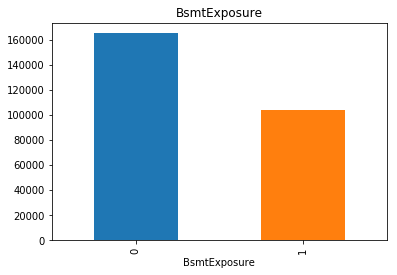

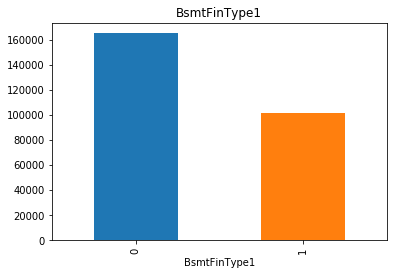

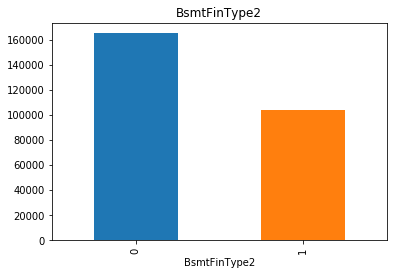

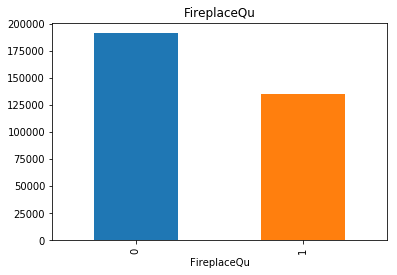

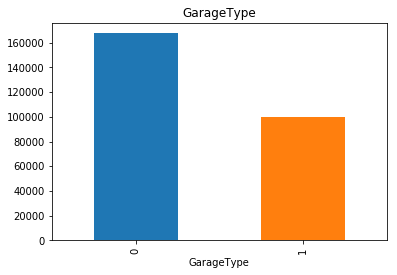

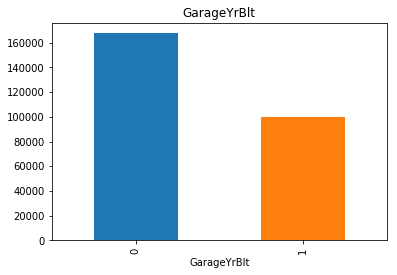

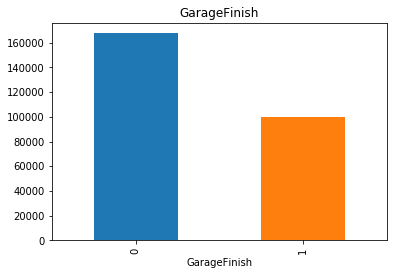

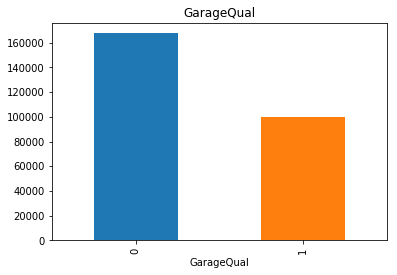

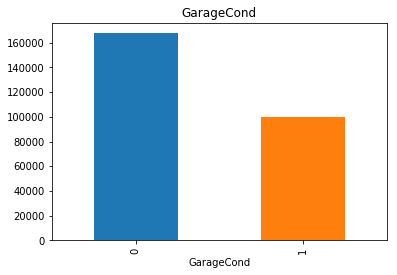

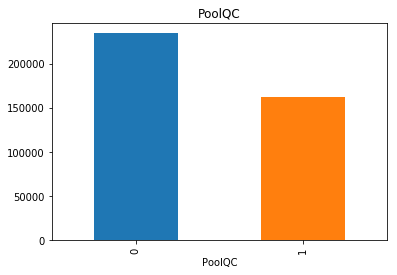

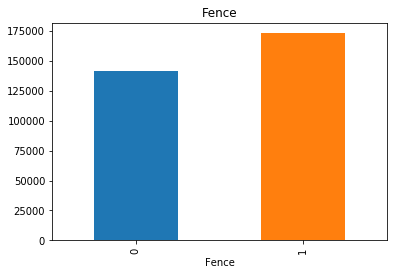

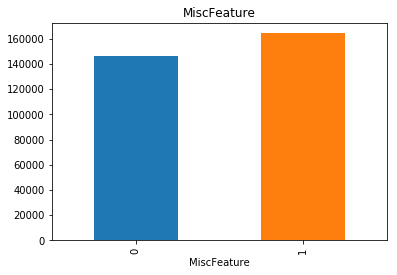

In [32]:
for x in var:
    var_impc_na(data,x)

In [40]:
#Now let us find the list of numeric variables in our data-set
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

In [43]:
data[num_vars].head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


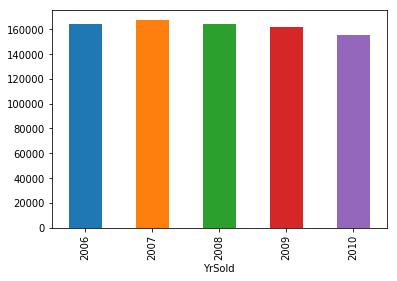

In [51]:
data.groupby('YrSold')['SalePrice'].median().plot.bar()

In [52]:
df=data.copy()

In [58]:
yrs_temp=[var for var in num_vars if 'Yr' in var or 'Year' in var]

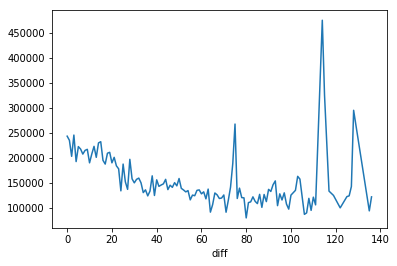

In [55]:
df['diff']=df['YrSold']-df['YearBuilt']
df.groupby('diff')['SalePrice'].median().plot.line()

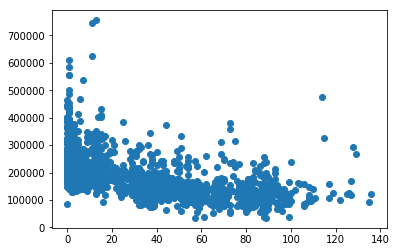

In [56]:
plt.scatter(df['diff'], df['SalePrice']) # we can see that there is drop in the price as the older features increases

Text(0.5,1,'Change in House price with the years')

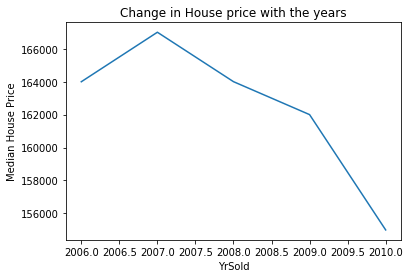

In [57]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House price with the years')

In [60]:
#Lets treat the discrete variables 
var_dis=[i for i in num_vars if len(data[i].unique())<20 and i not in yrs_temp+['Id']]

In [62]:
len(var_dis)

14

In [70]:
def analyse_discrete(df,var):
    df=df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    
    

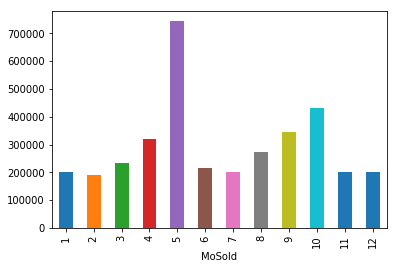

In [71]:
for i in var_dis:
    analyse_discrete(data,i)

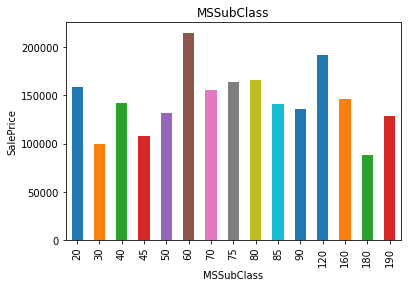

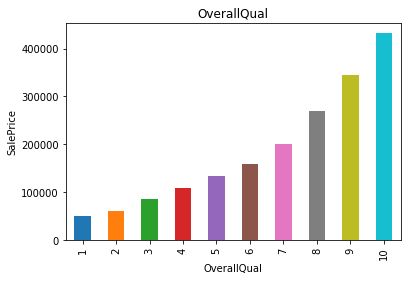

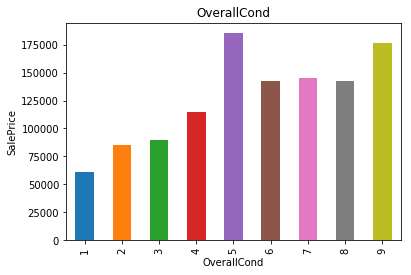

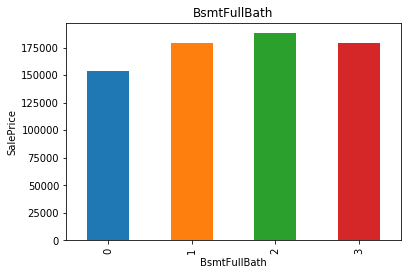

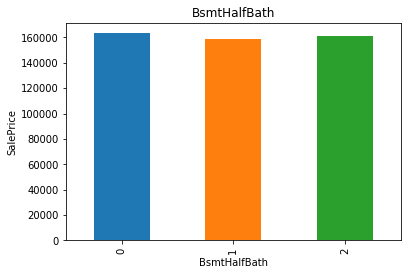

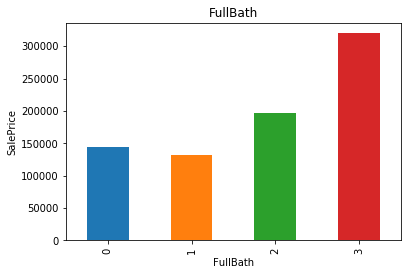

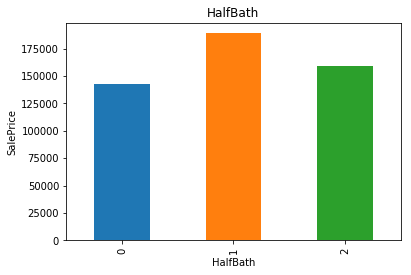

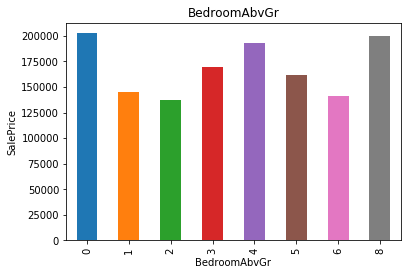

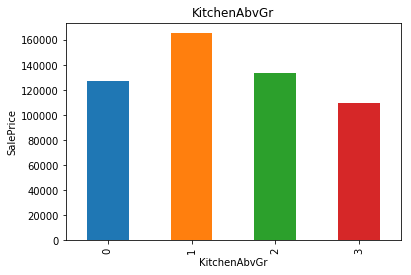

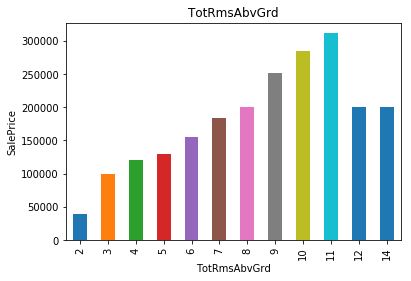

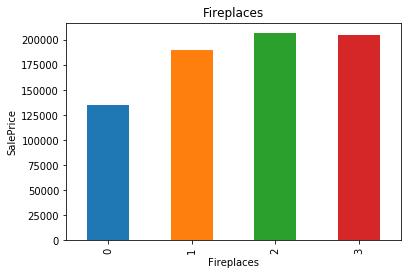

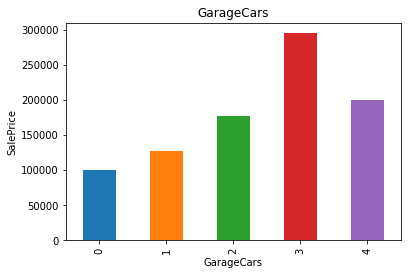

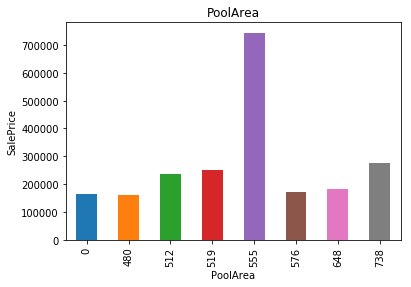

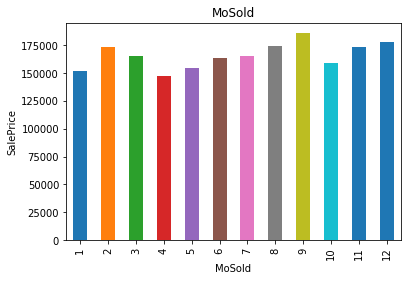

In [72]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in var_dis:
    analyse_discrete(data, var)

In [74]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in var_dis+yrs_temp+['Id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  19


In [76]:
def analyse_cont(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.title(var)
    plt.show()
    


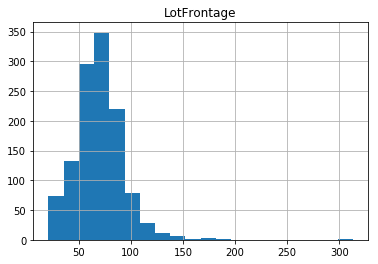

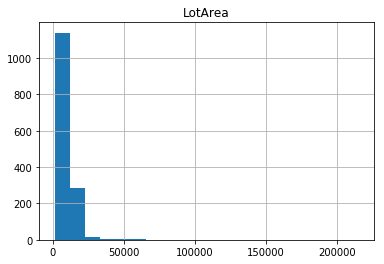

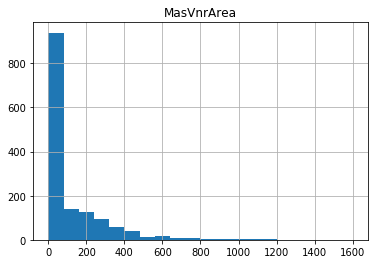

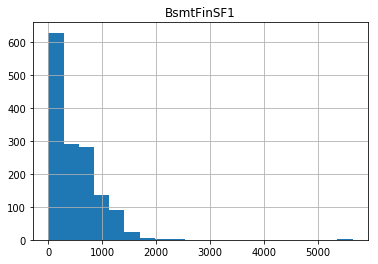

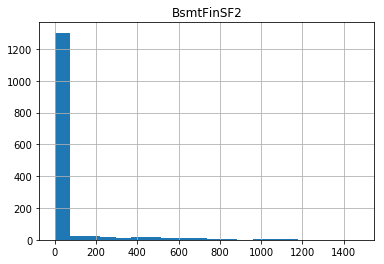

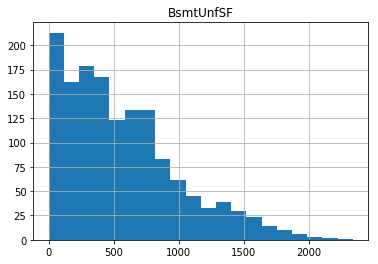

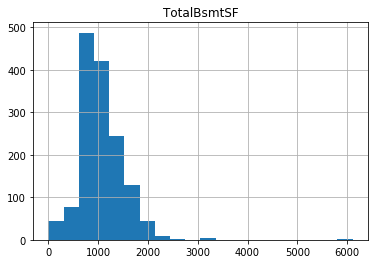

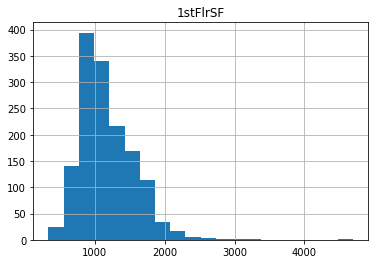

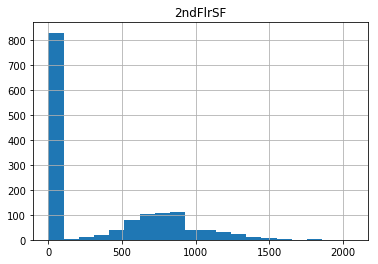

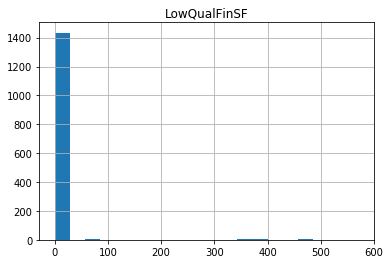

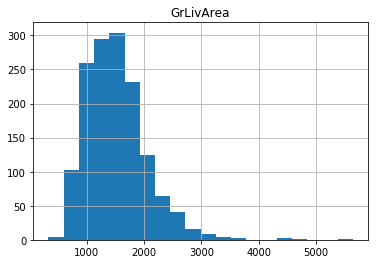

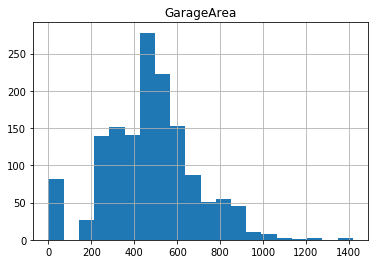

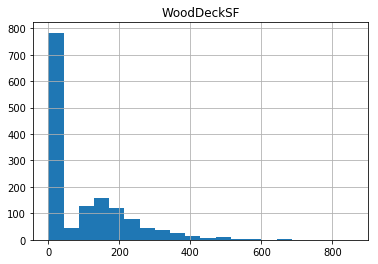

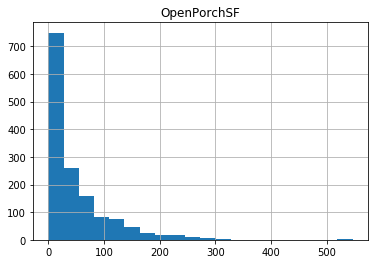

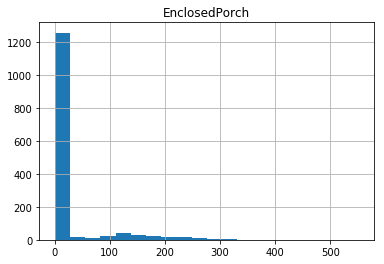

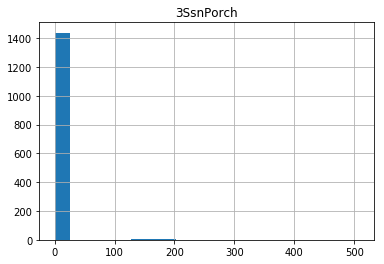

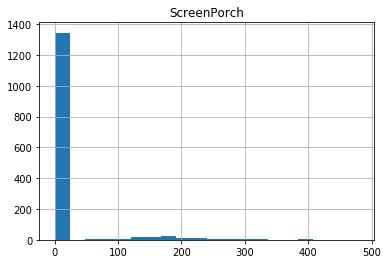

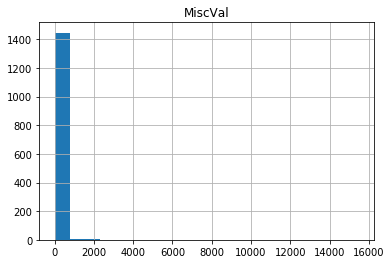

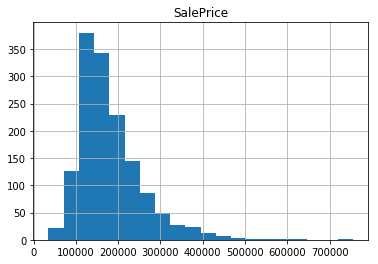

In [77]:
for var in cont_vars:
    analyse_cont(data, var)

In [78]:
#To get the better spread of the data we need to perform logarithmic transformation
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    


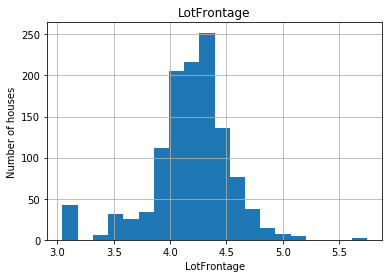

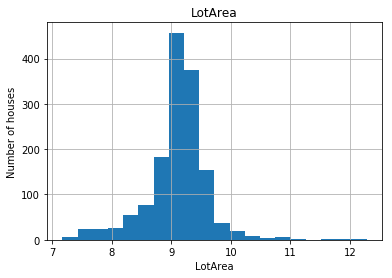

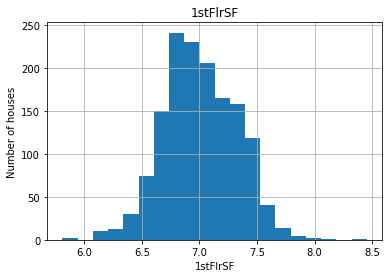

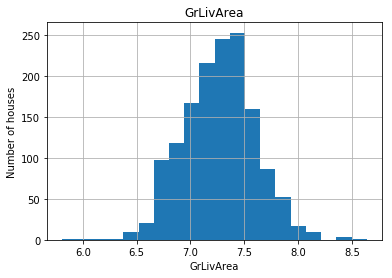

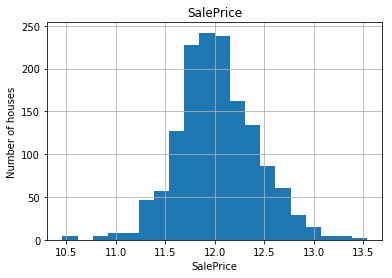

In [79]:
for var in cont_vars:
    analyse_transformed_continous(data, var)

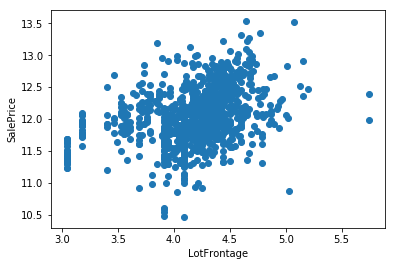

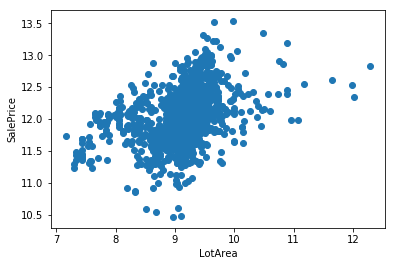

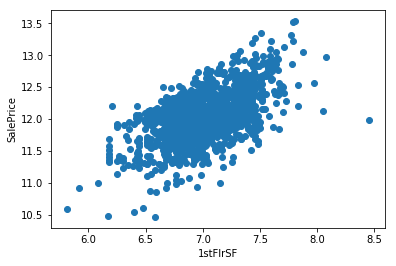

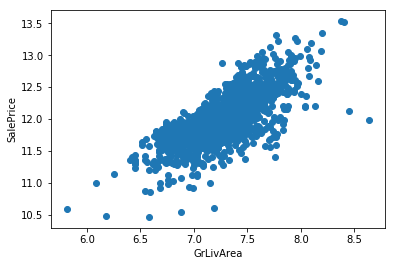

In [80]:
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[var], df['SalePrice'])
        plt.ylabel('SalePrice')
        plt.xlabel(var)
        plt.show()
    
for var in cont_vars:
    if var !='SalePrice':
        transform_analyse_continous(data, var)

In [81]:
#Lets check if there are any outliers
def outlie_check(df,var):
    df=df.copy()
    if 0 in df[var].unique():
        pass
    else:
        df[var]=np.log(df[var])
        df.boxplot(column=var)
        plt.show()
        

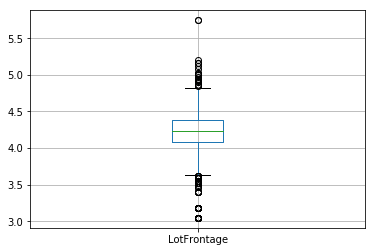

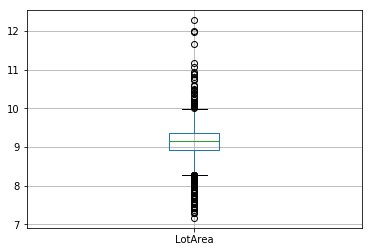

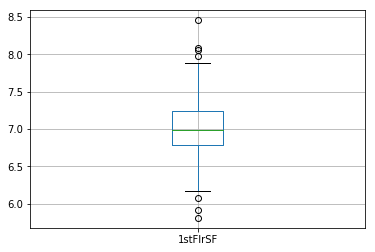

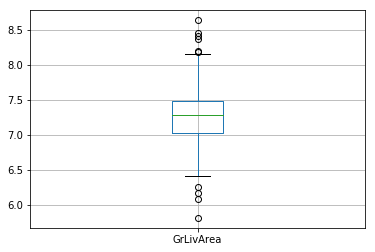

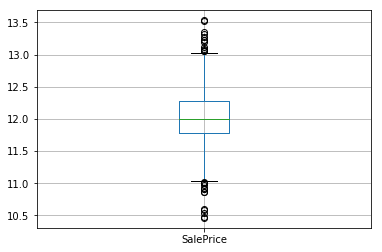

In [82]:
for i in cont_vars:
    outlie_check(data,i)
    
#we can see so many outliers by removinng them we can boost the performance,that will see in feature engineering step

In [83]:
#Lets focus on catogerical variables
cat_vars = [var for var in data.columns if data[var].dtypes=='O']

In [84]:
data[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [85]:
len(cat_vars)

43

In [87]:
#Number of Labels:Cardinality
for var in cat_vars:
    print(var, len(data[var].unique()), ' categories')

MSZoning 5  categories
Street 2  categories
Alley 3  categories
LotShape 4  categories
LandContour 4  categories
Utilities 2  categories
LotConfig 5  categories
LandSlope 3  categories
Neighborhood 25  categories
Condition1 9  categories
Condition2 8  categories
BldgType 5  categories
HouseStyle 8  categories
RoofStyle 6  categories
RoofMatl 8  categories
Exterior1st 15  categories
Exterior2nd 16  categories
MasVnrType 5  categories
ExterQual 4  categories
ExterCond 5  categories
Foundation 6  categories
BsmtQual 5  categories
BsmtCond 5  categories
BsmtExposure 5  categories
BsmtFinType1 7  categories
BsmtFinType2 7  categories
Heating 6  categories
HeatingQC 5  categories
CentralAir 2  categories
Electrical 6  categories
KitchenQual 4  categories
Functional 7  categories
FireplaceQu 6  categories
GarageType 7  categories
GarageFinish 4  categories
GarageQual 6  categories
GarageCond 6  categories
PavedDrive 3  categories
PoolQC 4  categories
Fence 5  categories
MiscFeature 5  categor

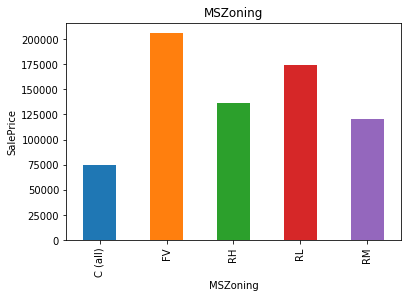

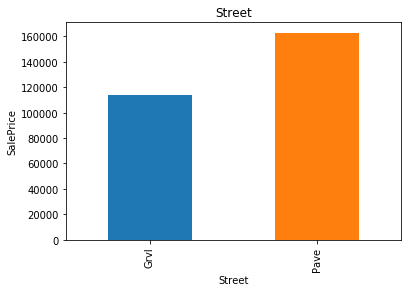

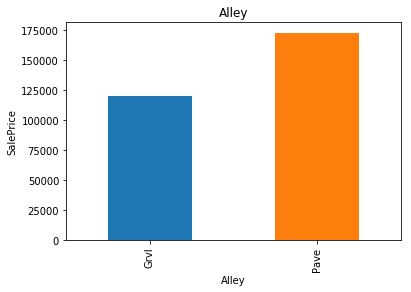

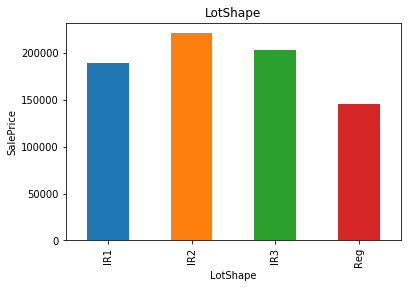

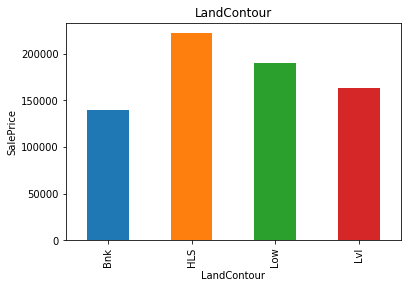

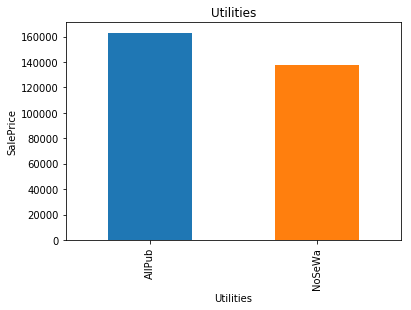

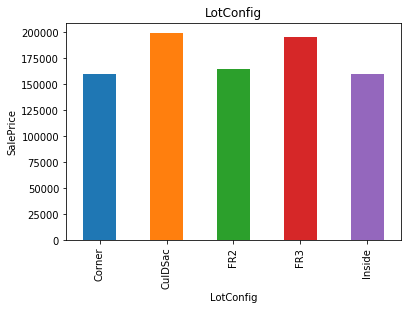

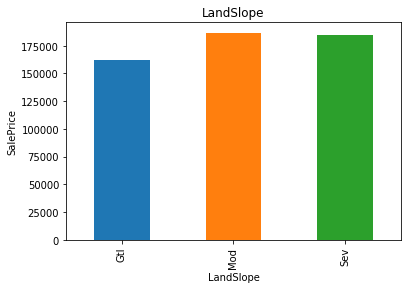

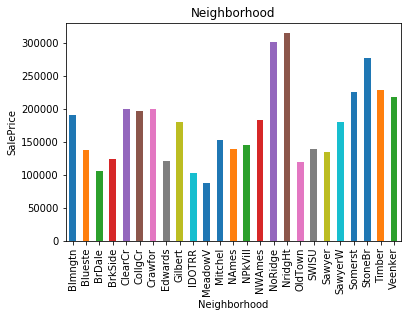

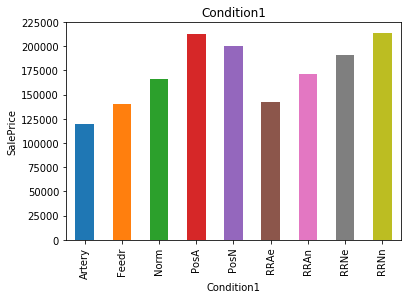

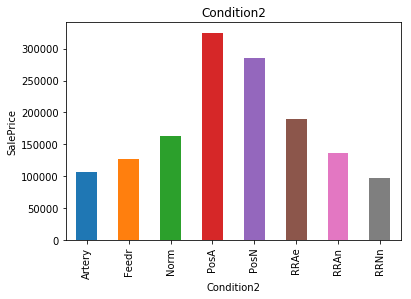

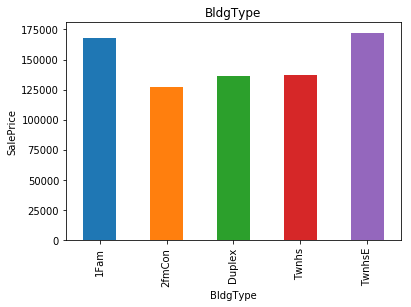

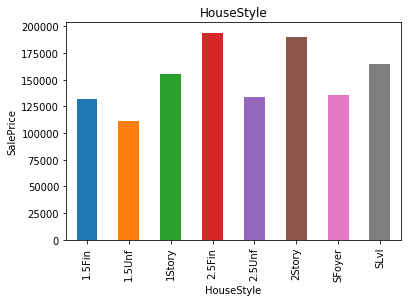

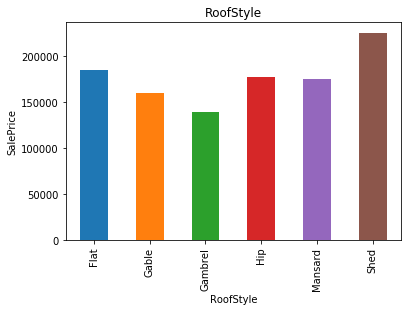

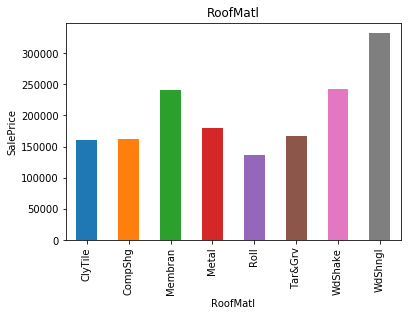

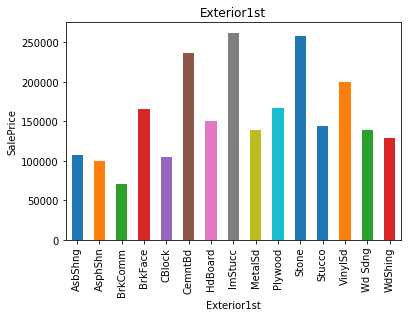

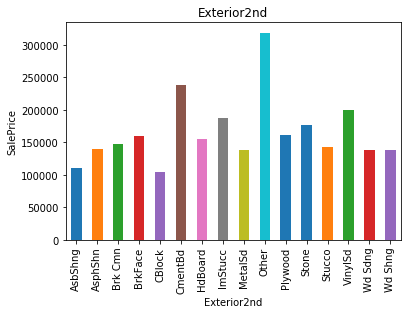

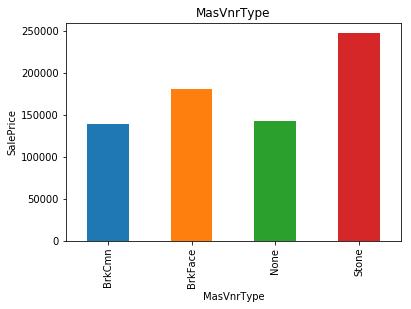

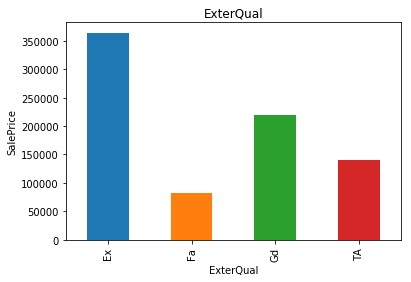

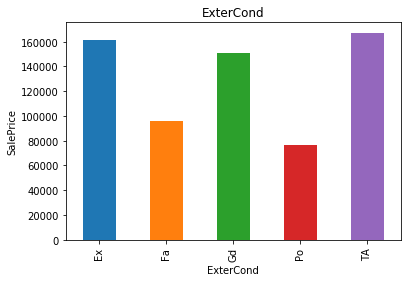

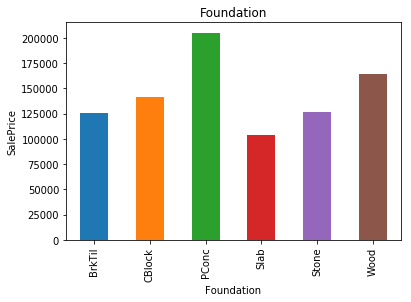

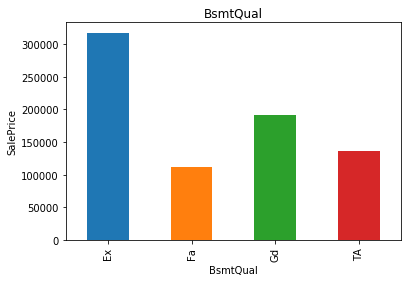

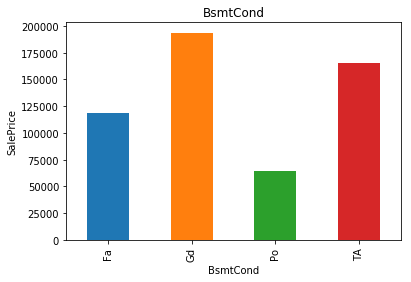

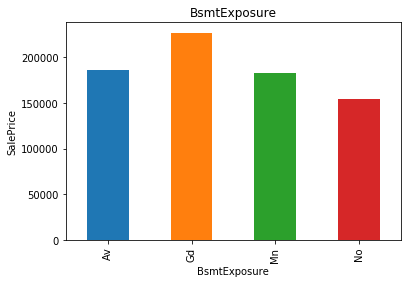

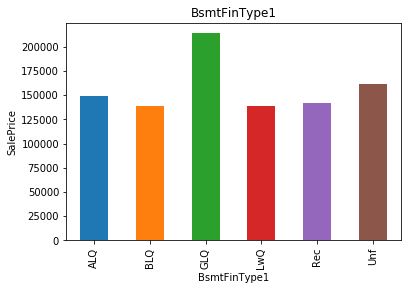

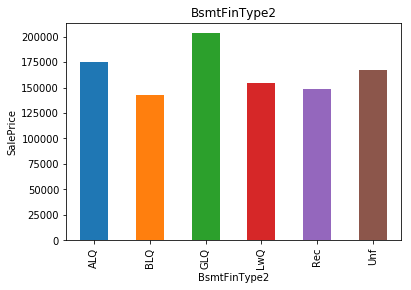

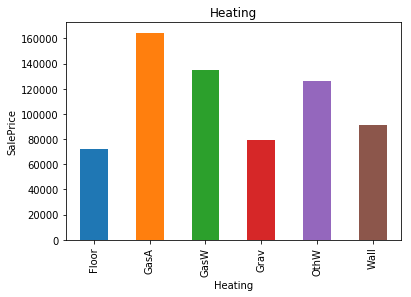

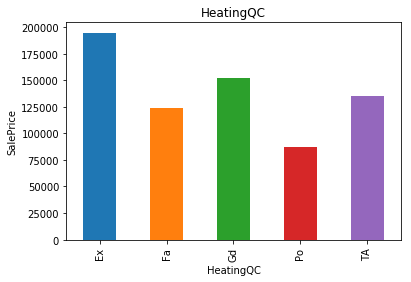

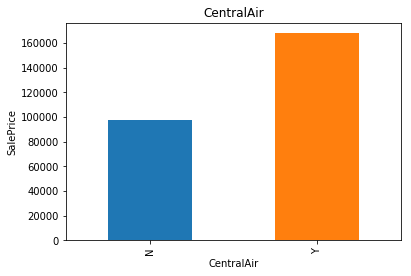

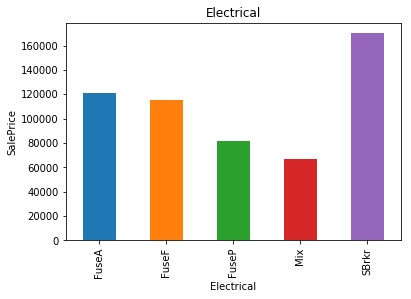

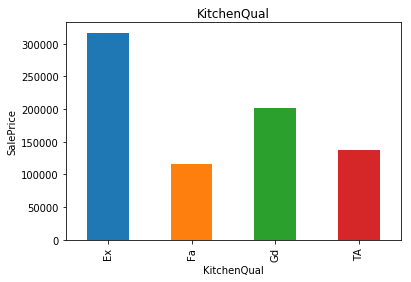

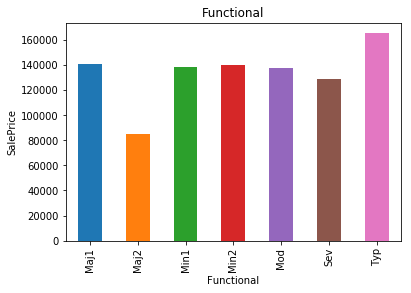

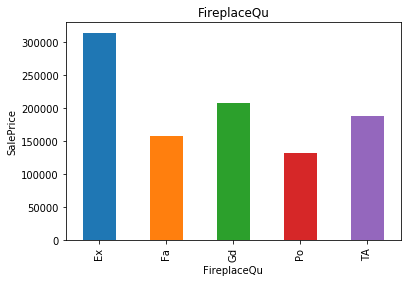

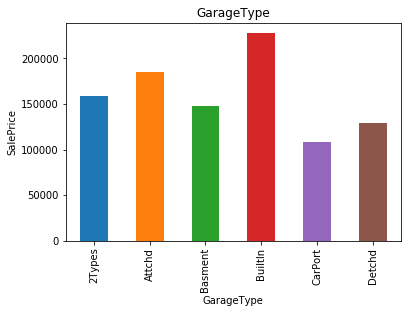

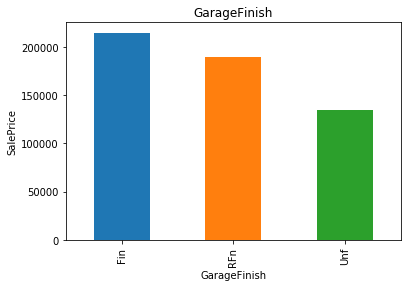

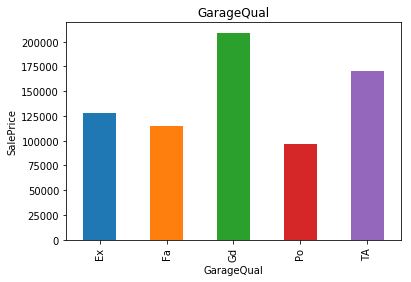

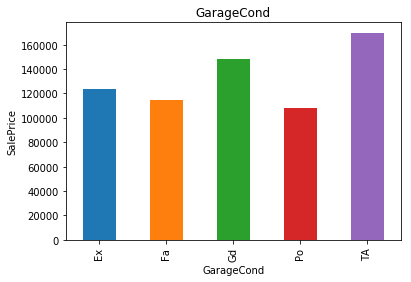

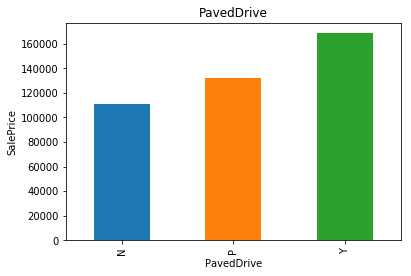

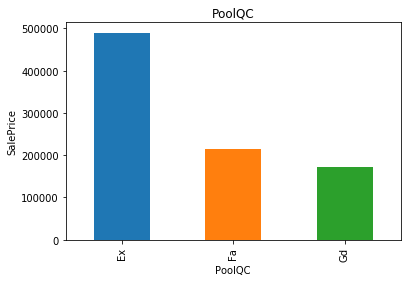

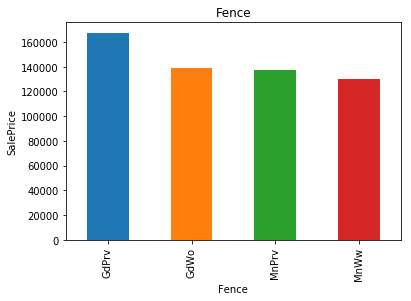

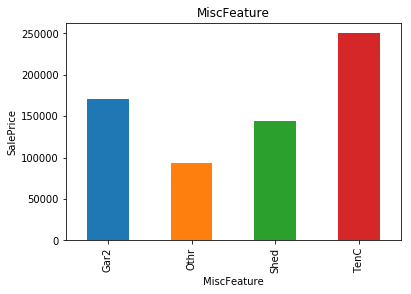

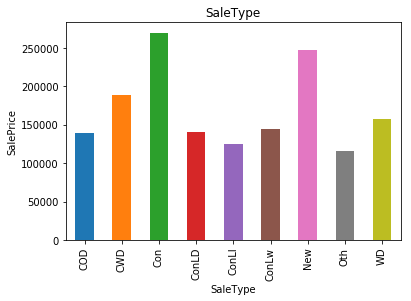

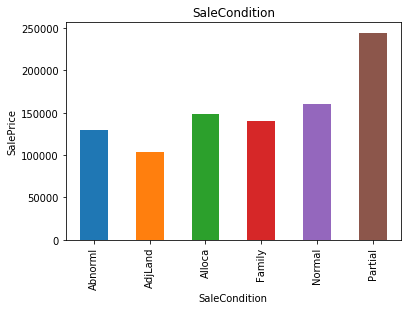

In [88]:
for var in cat_vars:
    analyse_discrete(data, var)